In [1]:
'''
This dataset has discrete data in features ie frequency data type
hence, it's most relevant to apply Mutinomial NB
'''
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df.shape

(5572, 2)

# 1.Data Cleaning

In [5]:
#missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
#duplicate values
df.duplicated().sum()

415

In [7]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [8]:
df.shape

(5157, 2)

In [9]:
#using one-hot encoding for spam=1 and ham=0
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
df.drop('Category',axis=1)

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


# 2. EDA

In [11]:
df['spam'].value_counts()

spam
0    4516
1     641
Name: count, dtype: int64

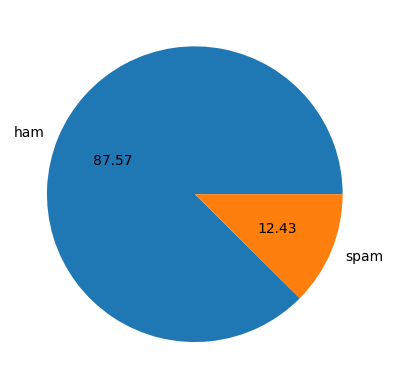

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
#data is imbalanced

# Model building

In [15]:
#splitting the training and testing data
#X= Message, y=spam
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam)

In [16]:
'''
CountVectorizer(): Method used in BoW(Bag of Words) text 
feature extraction. It converts a collection of text documents 
to a matrix of token counts. Each row in the matrix represents 
a document, and each column represents a word (token) in the vocabulary.

The BoW matrix returned by `fit_transform()` contains word counts for each document.
'''
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)
#class sklearn.naive_bayes.MultinomialNB(*, alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None)

MultinomialNB()

In [18]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [20]:
X_test_count=v.transform(X_test)
model.score(X_test_count,y_test)

0.9868217054263566

# Sklearn pipeline

In [21]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [22]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [23]:
clf.score(X_test,y_test)

0.9868217054263566

In [24]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [25]:
import pickle
pickle.dump(v,open('count_vec.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))